## KNN with Scratch

#### Euclidean Distance theory

KNN  is actually doing is computing distance between points, and then picking the most popular class of the top K classes of points nearest to it

 There are various ways to compute distance on a plane, many of which you can use here, but the most accepted version is Euclidean Distance, named after Euclid, a famous mathematician who is popularly referred to as the father of Geometry, and he definitely wrote the book (The Elements) on it, which is arguably the "bible" for mathematicians. Euclidean distance is:



<img src="https://pythonprogramming.net/static/images/machine-learning/euclidean-distance.png"/>

In [4]:
import numpy as np
plot1 = [1,3]
plot2 = [2,5]
euclidean_distance = np.sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )

In [5]:
euclidean_distance

2.2360679774997898

**That's basically the main math behind K Nearest Neighbors right there, now we just need to build a system to handle for the rest of the algorithm, like finding the closest distances, their group, and then voting.**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from math import sqrt
import warnings
from collections import Counter


**we create some data**

In [9]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

** create a quick graph by doing **

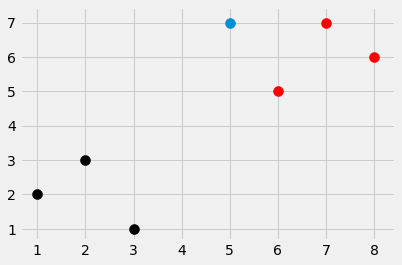

In [11]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

plt.show()


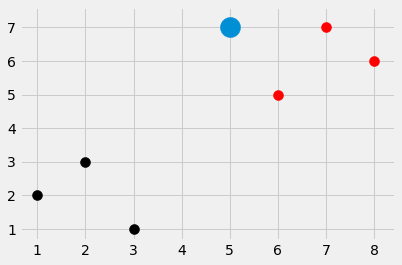

In [27]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)
plt.scatter(new_features[0], new_features[1], s=400)
plt.show()

We have our data, now we want to create some sort of function that will actually classify the data:

def k_nearest_neighbors(data, predict, k=3):

    return vote_result

In [14]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')

    return vote_result

In [17]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = sqrt( (features[0]-predict[0])**2 + (features[1]-predict[1])**2 )
            distances.append([euclidean_distance,group])

That's one way to calculate Euclidean distance, and it's the most clear when it comes to being obvious about following the definition. That said, using NumPy is going to be quite a bit faster. With KNN being a sort of brute-force method for machine learning, we need all the help we can get. Thus, we're going to modify the function a bit. One option could be:

In [20]:
euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
print(euclidean_distance)

NameError: name 'features' is not defined

This is still relatively clear, we're just using the NumPy version of things. Numpy is a C-optimized and very efficient library, allowing us to perform math much quicker in many cases. That said, it turns out, Numpy actually has various linear algebra functions we can use. For example, there's norm (which is the same calculation we're looking for):

In [ ]:
euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
print(euclidean_distance)

In [21]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [22]:
result = k_nearest_neighbors(dataset, new_features)
print(result)

r


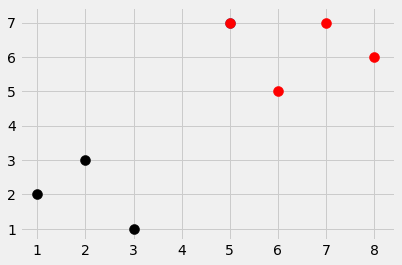

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
# same as:
##for i in dataset:
##    for ii in dataset[i]:
##        plt.scatter(ii[0],ii[1],s=100,color=i)
        
plt.scatter(new_features[0], new_features[1], s=100)

result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()